# Optimizing Arabic Dialect Translation for Children's Literature Using Neural Models

This notebook contains the code for fine-tuning the AraT5 model to translate children's stories from Modern Standard Arabic (MSA) to the Egyptian dialect. "
     "The fine-tuning process involves several steps, including data preprocessing, model training, and evaluation using BLEU scores and semantic similarity metrics

In [ ]:
pip install datasets

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 547.8/547.8 kB 10.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 40.8/40.8 MB 39.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 19.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 64.9/64.9 kB 11.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 25.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 15.5 MB/s eta 0:00:00
  Attempting uninstall: requests
    Found existing installation: requests 2.31.0
    Uninstalling requests-2.31.0:
      Successfully uninstalled requests-2.31.0
  Attempting uninstall: pyarrow
    Found existing installation: pyarrow 14.0.2
    Uninstalling pyarrow-14.0.2:
      Successfully uninstalled pyarrow-14.0.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
cudf-cu12

In [ ]:
pip install sentence_transformers

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 227.1/227.1 kB 5.9 MB/s eta 0:00:00
  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (23.7 MB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (823 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (14.1 MB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl (731.7 MB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl (410.6 MB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl (121.6 MB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl (56.5 MB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl (124.2 MB)
  Using cached nvidia_cusparse_cu12-12.1.0.106-py3-none-manylinux1_x86_64.whl (196.0 MB)
  Using cached nvidia_nccl_cu12-2.20.5-py3-none-manylinux2014_x86_64.whl (176.2 MB)
  Using cached nvidia_nvtx_cu12-12.1.105-py3-none-m

In [ ]:
pip install transformers[torch]

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 309.4/309.4 kB 8.3 MB/s eta 0:00:00


In [ ]:
pip install tqdm

In [ ]:
pip install accelerate -U

In [ ]:
from transformers import pipeline

# Initialize the pipeline with the pre-trained model
pipe = pipeline("text2text-generation", model="PRAli22/arat5-base-arabic-dialects-translation")

# Test the model with an MSA sentence
msa_sentence = "محمد وأخته سارة كانوا ماشيين في الشارع في يوم من الأيام"
translation = pipe(msa_sentence)

print("Initial translation:", translation[0]['generated_text'])


/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/842 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/1.13G [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/142 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/410 [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/7.76M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/74.0 [00:00<?, ?B/s]

/usr/local/lib/python3.10/dist-packages/transformers/generation/utils.py:1168: UserWarning: Using the model-agnostic default `max_length` (=20) to control the generation length. We recommend setting `max_new_tokens` to control the maximum length of the generation.
  warnings.warn(


Initial translation: محمد وأخت سارة كانوا يمرون في الشارع في يوم يوم 


In [ ]:
from transformers import pipeline

# Initialize the pipeline with the pre-trained model
pipe = pipeline("text2text-generation", model="PRAli22/arat5-base-arabic-dialects-translation")

# Function to read sentences from a text file
def read_sentences(input_file):
    with open(input_file, 'r', encoding='utf-8') as file:
        sentences = file.readlines()
    return [sentence.strip() for sentence in sentences]

# Function to write translations to a text file
def write_translations(output_file, translations):
    with open(output_file, 'w', encoding='utf-8') as file:
        for translation in translations:
            file.write(translation + '\n')

# Main function to read, translate, and write
def translate_file(input_file, output_file):
    # Read sentences from the input file
    sentences = read_sentences(input_file)

    # Translate sentences with beam search to ensure completeness
    translations = []
    for sentence in sentences:
        result = pipe(sentence, max_length=512, num_beams=4, early_stopping=True)
        translations.append(result[0]['generated_text'])

    # Write translations to the output file
    write_translations(output_file, translations)

# Specify the input and output file paths
input_file = 'input_sentences.txt'
output_file = 'translated_sentences.txt'

# Translate sentences from the input file and write to the output file
translate_file(input_file, output_file)

print("Translation completed. Check the translated_sentences.txt file for results.")


Translation completed. Check the translated_sentences.txt file for results.


In [ ]:
import pandas as pd

# Load the Cairo training set
file_path = '/content/LINE BY LINE.xlsx'
cairo_training_set = pd.read_excel(file_path)

# Display the first few rows of the dataframe to understand its structure
cairo_training_set.head()

,Original MSA,EGP (Claude),ARAT5 Basic
0,Title =”الضفدع و الباعوض”,الضفدع والناموس,NaN
1,كانَ ضفدعٌ منهمكاً في صيد البعوض بلسانهِ...,كان في ضفدع مشغول بصيد الناموس بلسانه...,NaN
2,سألته بعوضةٌ كانت واقفة على غصن بعيدةً عن لسانه:,سألته ناموسة كانت واقفة على غصن بعيد عن لسانه:,NaN
3,لماذا أنتَ هكذا، تطاردنا دائماً وتصطادنا؟!..,ليه انت كده، بتجري ورانا على طول وبتصطادنا؟!..,NaN
4,نظر الضفدعُ إليها بدهشةٍ وقال: لأنكم مزعجون، ت...,بص الضفدع ليها باستغراب وقال: عشان انتوا مزعجي...,NaN


In [ ]:
import pandas as pd
from transformers import pipeline
from sentence_transformers import SentenceTransformer, util
from tqdm import tqdm

# Load the Cairo training set
file_path = '/content/LINE BY LINE.xlsx'
cairo_training_set = pd.read_excel(file_path)

# Display the first few rows of the dataframe to understand its structure
cairo_training_set.head()

# Initialize the pipeline with the pre-trained model
pipe = pipeline("text2text-generation", model="PRAli22/arat5-base-arabic-dialects-translation")

# Function to translate sentences using the pipeline with progress bar
def translate_sentences(sentences):
    translations = []
    for sentence in tqdm(sentences, desc="Translating sentences"):
        result = pipe(sentence, max_length=512, num_beams=4, early_stopping=True)
        translations.append(result[0]['generated_text'])
    return translations

# Extract the MSA sentences from the dataframe
msa_sentences = cairo_training_set['Original MSA'].tolist()

# Translate the MSA sentences to the target dialect
translated_sentences = translate_sentences(msa_sentences)

# Add the translations to the dataframe
cairo_training_set['ARAT5 Basic'] = translated_sentences

# Initialize the model for sentence embeddings
model = SentenceTransformer('sentence-transformers/bert-base-nli-mean-tokens')

# Function to compute similarity
def compute_similarity(original, translated):
    original_embeddings = model.encode(original, convert_to_tensor=True)
    translated_embeddings = model.encode(translated, convert_to_tensor=True)
    similarities = util.pytorch_cos_sim(original_embeddings, translated_embeddings)
    return similarities.diagonal().tolist()

# Compute similarity scores
similarity_scores = compute_similarity(msa_sentences, translated_sentences)

# Add the similarity scores to the dataframe
cairo_training_set['Similarity'] = similarity_scores

# Save the results to a new Excel file
output_file = '/content/translated_sentences_with_similarity.xlsx'
cairo_training_set.to_excel(output_file, index=False)

print("Translation and similarity computation completed. Check the translated_sentences_with_similarity.xlsx file for results.")


Translating sentences: 100%|██████████| 91/91 [01:26<00:00,  1.06it/s]


modules.json:   0%|          | 0.00/229 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/122 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/3.99k [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

/usr/local/lib/python3.10/dist-packages/huggingface_hub/file_download.py:1132: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(


config.json:   0%|          | 0.00/625 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/438M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/399 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

added_tokens.json:   0%|          | 0.00/2.00 [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

1_Pooling/config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

Translation and similarity computation completed. Check the translated_sentences_with_similarity.xlsx file for results.


In [ ]:
import pandas as pd

# Load the Cairo training set
file_path = '/content/translated_sentences_with_similarity.xlsx'
cairo_translated = pd.read_excel(file_path)

# Display the first few rows of the dataframe to understand its structure
cairo_translated.head()

,Original MSA,EGP (Claude),ARAT5 Basic,Similarity
0,Title =”الضفدع و الباعوض”,الضفدع والناموس,"العنوان ، هو "" المحادب و الحمى .",0.879857
1,كانَ ضفدعٌ منهمكاً في صيد البعوض بلسانهِ...,كان في ضفدع مشغول بصيد الناموس بلسانه...,كان كلب مشغولا في صيد الكلاب بلسانه .,0.972220
2,سألته بعوضةٌ كانت واقفة على غصن بعيدةً عن لسانه:,سألته ناموسة كانت واقفة على غصن بعيد عن لسانه:,قلت لي بعوضة كانت واقفة على رأس رأس بعيد عن لس...,0.990116
3,لماذا أنتَ هكذا، تطاردنا دائماً وتصطادنا؟!..,ليه انت كده، بتجري ورانا على طول وبتصطادنا؟!..,لماذا أنت كذلك ، تطاردنا دائما وصطادنا ؟,0.976128
4,نظر الضفدعُ إليها بدهشةٍ وقال: لأنكم مزعجون، ت...,بص الضفدع ليها باستغراب وقال: عشان انتوا مزعجي...,"نظر الضفدع إليها , لأنكم مزعجون ، تدخلون غرفة ...",0.995595


In [ ]:
from nltk.translate.bleu_score import sentence_bleu, SmoothingFunction
import pandas as pd

# Load the translated sentences with similarity scores
file_path = '/content/translated_sentences_with_similarity.xlsx'
translated_data = pd.read_excel(file_path)

# Function to calculate BLEU scores
def calculate_bleu_scores(references, candidates):
    smoothie = SmoothingFunction().method4
    scores = []
    for ref, cand in zip(references, candidates):
        ref = [ref.split()]
        cand = cand.split()
        score = sentence_bleu(ref, cand, smoothing_function=smoothie)
        scores.append(score)
    return scores

# Extract the MSA sentences and translated sentences from the dataframe
msa_sentences = translated_data['Original MSA'].tolist()
translated_sentences = translated_data['ARAT5 Basic'].tolist()

# Calculate BLEU scores for the translations
bleu_scores = calculate_bleu_scores(msa_sentences, translated_sentences)

# Add BLEU scores to the dataframe
translated_data['BLEU'] = bleu_scores

# Save the results to a new Excel file
output_file_with_bleu = '/content/translated_sentences_with_similarity_bleu.xlsx'
translated_data.to_excel(output_file_with_bleu, index=False)

# Display the updated dataframe with BLEU scores
translated_data.head()


,Original MSA,EGP (Claude),ARAT5 Basic,Similarity,BLEU
0,Title =”الضفدع و الباعوض”,الضفدع والناموس,"العنوان ، هو "" المحادب و الحمى .",0.879857,0.028600
1,كانَ ضفدعٌ منهمكاً في صيد البعوض بلسانهِ...,كان في ضفدع مشغول بصيد الناموس بلسانه...,كان كلب مشغولا في صيد الكلاب بلسانه .,0.972220,0.071227
2,سألته بعوضةٌ كانت واقفة على غصن بعيدةً عن لسانه:,سألته ناموسة كانت واقفة على غصن بعيد عن لسانه:,قلت لي بعوضة كانت واقفة على رأس رأس بعيد عن لس...,0.990116,0.113735
3,لماذا أنتَ هكذا، تطاردنا دائماً وتصطادنا؟!..,ليه انت كده، بتجري ورانا على طول وبتصطادنا؟!..,لماذا أنت كذلك ، تطاردنا دائما وصطادنا ؟,0.976128,0.034011
4,نظر الضفدعُ إليها بدهشةٍ وقال: لأنكم مزعجون، ت...,بص الضفدع ليها باستغراب وقال: عشان انتوا مزعجي...,"نظر الضفدع إليها , لأنكم مزعجون ، تدخلون غرفة ...",0.995595,0.078592


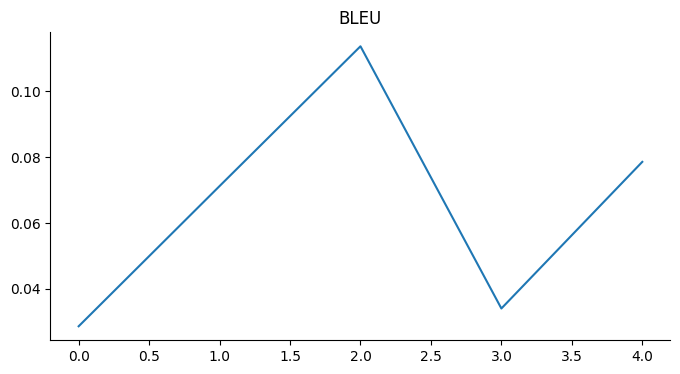

In [ ]:
from matplotlib import pyplot as plt
_df_7['BLEU'].plot(kind='line', figsize=(8, 4), title='BLEU')
plt.gca().spines[['top', 'right']].set_visible(False)

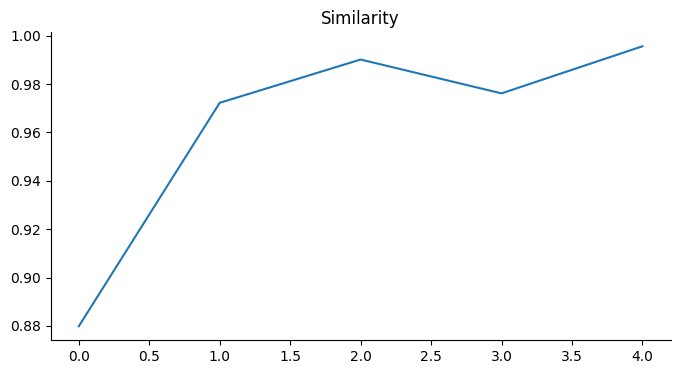

In [ ]:
from matplotlib import pyplot as plt
_df_6['Similarity'].plot(kind='line', figsize=(8, 4), title='Similarity')
plt.gca().spines[['top', 'right']].set_visible(False)

In [ ]:
!rm -rf /content/sample_data*


In [ ]:
!pip install sentencepiece

In [ ]:
pip install transformers[torch]

In [ ]:
import torch

torch.cuda.empty_cache()

In [ ]:
import gc
import torch

# Collect garbage
gc.collect()

# Clear the cache
torch.cuda.empty_cache()


In [ ]:
import torch

# Check memory usage
print(torch.cuda.memory_allocated())
print(torch.cuda.memory_reserved())

# Clear the cache
torch.cuda.empty_cache()

# Check memory usage again
print(torch.cuda.memory_allocated())
print(torch.cuda.memory_reserved())


0
0
0
0


In [ ]:
from transformers import AutoTokenizer, AutoModelForSeq2SeqLM, Trainer, TrainingArguments


Here, we train the AraT5 model using the preprocessed data. The training process involves fine-tuning the model on the Egyptian dialect-specific dataset,
     optimizing hyperparameters, and monitoring training and validation loss to ensure model performance

In [ ]:

import pandas as pd
from datasets import Dataset
from transformers import T5Tokenizer, T5ForConditionalGeneration, Trainer, TrainingArguments

# Load the Cairo training set from the CSV file
file_path = '/content/CAIRO TRAINING SET.csv'
cairo_training_set = pd.read_csv(file_path)

# Prepare the dataset
dataset = Dataset.from_pandas(cairo_training_set[['CAI', 'MSA']])
dataset = dataset.rename_column("CAI", "translation_cai")
dataset = dataset.rename_column("MSA", "translation_msa")

# Load the tokenizer and model
tokenizer = AutoTokenizer.from_pretrained("PRAli22/arat5-base-arabic-dialects-translation")
model = T5ForConditionalGeneration.from_pretrained("PRAli22/arat5-base-arabic-dialects-translation")
# Preprocess the data
def preprocess_function(examples):
    inputs = examples['translation_cai']
    targets = examples['translation_msa']
    model_inputs = tokenizer(inputs, max_length=512, truncation=True, padding="max_length")
    labels = tokenizer(targets, max_length=512, truncation=True, padding="max_length").input_ids
    model_inputs["labels"] = labels
    return model_inputs

tokenized_datasets = dataset.map(preprocess_function, batched=True)

# Define the training arguments
training_args = TrainingArguments(
    output_dir="./results",
    evaluation_strategy="epoch",
    learning_rate=2e-5,
    per_device_train_batch_size=4,
    per_device_eval_batch_size=4,
    num_train_epochs=5,
    weight_decay=0.1,
    save_steps=5000,  # Save checkpoints every 5000 steps
    save_total_limit=2,  # Keep only the last 2 checkpoints
)

# Initialize the Trainer
trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=tokenized_datasets,
    eval_dataset=tokenized_datasets,
)

# Train the model
trainer.train()

# Save the model
model.save_pretrained("/content/arat5-finetuned-cai-to-msa")
tokenizer.save_pretrained("/content/arat5-finetuned-cai-to-msa")

print("Model fine-tuning completed. The model is saved in /content/arat5-finetuned-cai-to-msa.")

Map:   0%|          | 0/9584 [00:00<?, ? examples/s]

/usr/local/lib/python3.10/dist-packages/transformers/training_args.py:1474: FutureWarning: `evaluation_strategy` is deprecated and will be removed in version 4.46 of 🤗 Transformers. Use `eval_strategy` instead
  warnings.warn(


Epoch,Training Loss,Validation Loss
1,0.048400,0.036258
2,0.048700,0.034739
3,0.044400,0.033566
4,0.045300,0.032967
5,0.045300,0.032748


Model fine-tuning completed. The model is saved in /content/arat5-finetuned-cai-to-msa.


In [ ]:
import pandas as pd
from tqdm import tqdm
from sentence_transformers import SentenceTransformer, util
from nltk.translate.bleu_score import sentence_bleu, SmoothingFunction
from transformers import pipeline

# Load the translated sentences with similarity and BLEU scores
translated_data = pd.read_excel('/content/translated_sentences_with_similarity_bleu.xlsx')

# Initialize the pipeline with the fine-tuned model
pipe = pipeline("text2text-generation", model=model, tokenizer=tokenizer)

# Function to translate sentences using the pipeline with progress bar
def translate_sentences(sentences):
    translations = []
    for sentence in tqdm(sentences, desc="Translating sentences"):
        result = pipe(sentence, max_length=512, num_beams=4, early_stopping=True)
        translations.append(result[0]['generated_text'])
    return translations

# Extract the MSA sentences from the dataframe
msa_sentences = translated_data['Original MSA'].tolist()

# Translate the MSA sentences to the target dialect using the fine-tuned model
translated_sentences = translate_sentences(msa_sentences)

# Add the translations to the dataframe
translated_data['arat5-finetuned-cai-to-msa'] = translated_sentences

# Initialize the model for sentence embeddings
embedding_model = SentenceTransformer('sentence-transformers/bert-base-nli-mean-tokens')

# Function to compute similarity
def compute_similarity(original, translated):
    original_embeddings = embedding_model.encode(original, convert_to_tensor=True)
    translated_embeddings = embedding_model.encode(translated, convert_to_tensor=True)
    similarities = util.pytorch_cos_sim(original_embeddings, translated_embeddings)
    return similarities.diagonal().tolist()

# Compute similarity scores for the fine-tuned translations
similarity_scores = compute_similarity(msa_sentences, translated_sentences)

# Add the similarity scores to the dataframe
translated_data['Fine-Tuned Similarity'] = similarity_scores

# Function to calculate BLEU scores
def calculate_bleu_scores(references, candidates):
    smoothie = SmoothingFunction().method4
    scores = []
    for ref, cand in zip(references, candidates):
        ref = [ref.split()]
        cand = cand.split()
        score = sentence_bleu(ref, cand, smoothing_function=smoothie)
        scores.append(score)
    return scores

# Calculate BLEU scores for the fine-tuned translations
bleu_scores = calculate_bleu_scores(msa_sentences, translated_sentences)

# Add BLEU scores to the dataframe
translated_data['Fine-Tuned BLEU'] = bleu_scores

# Save the results to a new Excel file
output_file_with_fine_tuning = '/content/translated_sentences_with_arat5-finetuned-cai-to-msa.xlsx'
translated_data.to_excel(output_file_with_fine_tuning, index=False)

# Display the updated dataframe with the new similarity and BLEU scores
print(translated_data.head())


Translating sentences:   7%|▋         | 6/91 [00:03<00:48,  1.74it/s]

In [ ]:
import pandas as pd
from datasets import Dataset
from transformers import T5Tokenizer, T5ForConditionalGeneration, Trainer, TrainingArguments
from sklearn.model_selection import train_test_split

# Load the Cairo training set from the CSV file
file_path = '/content/CAIRO TRAINING SET.csv'
cairo_training_set = pd.read_csv(file_path)

# Prepare the dataset
dataset = Dataset.from_pandas(cairo_training_set[['CAI', 'MSA']])
dataset = dataset.rename_column("CAI", "translation_cai")
dataset = dataset.rename_column("MSA", "translation_msa")

# Split the dataset into train and test sets
train_dataset, test_dataset = train_test_split(dataset, test_size=0.2, random_state=42)

# Load the tokenizer and model
tokenizer = AutoTokenizer.from_pretrained("PRAli22/arat5-base-arabic-dialects-translation")
model = T5ForConditionalGeneration.from_pretrained("PRAli22/arat5-base-arabic-dialects-translation")

# Preprocess the data
def preprocess_function(examples):
    inputs = examples['translation_cai']
    targets = examples['translation_msa']
    model_inputs = tokenizer(inputs, max_length=512, truncation=True, padding="max_length")
    labels = tokenizer(targets, max_length=512, truncation=True, padding="max_length").input_ids
    model_inputs["labels"] = labels
    return model_inputs

tokenized_train_dataset = train_dataset.map(preprocess_function, batched=True)
tokenized_test_dataset = test_dataset.map(preprocess_function, batched=True)

# Define the training arguments
training_args = TrainingArguments(
    output_dir="./results",
    evaluation_strategy="epoch",
    learning_rate=2e-5,
    per_device_train_batch_size=4,
    per_device_eval_batch_size=4,
    num_train_epochs=10,
    weight_decay=0.01,
    save_steps=5000,  # Save checkpoints every 5000 steps
    save_total_limit=2,  # Keep only the last 2 checkpoints
)

# Initialize the Trainer
trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=tokenized_train_dataset,
    eval_dataset=tokenized_test_dataset,
)

# Train the model
trainer.train()

# Save the model
model.save_pretrained("/content/arat5-finetuned2-cai-to-msa")
tokenizer.save_pretrained("/content/arat5-finetuned2-cai-to-msa")

print("Model fine-tuning completed. The model is saved in /content/arat5-finetuned2-cai-to-msa.")


In [ ]:

import pandas as pd
from datasets import Dataset
from transformers import T5Tokenizer, T5ForConditionalGeneration, Trainer, TrainingArguments

# Load the Cairo training set from the CSV file
file_path = '/content/CAIRO TRAINING SET.csv'
cairo_training_set = pd.read_csv(file_path)

# Prepare the dataset
dataset = Dataset.from_pandas(cairo_training_set[['CAI', 'MSA']])
dataset = dataset.rename_column("CAI", "translation_cai")
dataset = dataset.rename_column("MSA", "translation_msa")

# Load the tokenizer and model
tokenizer = AutoTokenizer.from_pretrained("PRAli22/arat5-base-arabic-dialects-translation")
model = T5ForConditionalGeneration.from_pretrained("PRAli22/arat5-base-arabic-dialects-translation")
# Preprocess the data
def preprocess_function(examples):
    inputs = examples['translation_cai']
    targets = examples['translation_msa']
    model_inputs = tokenizer(inputs, max_length=512, truncation=True, padding="max_length")
    labels = tokenizer(targets, max_length=512, truncation=True, padding="max_length").input_ids
    model_inputs["labels"] = labels
    return model_inputs

tokenized_datasets = dataset.map(preprocess_function, batched=True)

# Define the training arguments
training_args = TrainingArguments(
    output_dir="./results",
    evaluation_strategy="epoch",
    learning_rate=2e-5,
    per_device_train_batch_size=4,
    per_device_eval_batch_size=4,
    num_train_epochs=10,
    weight_decay=0.01,
    save_steps=5000,  # Save checkpoints every 5000 steps
    save_total_limit=2,  # Keep only the last 2 checkpoints
)

# Initialize the Trainer
trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=tokenized_datasets,
    eval_dataset=tokenized_datasets,
)

# Train the model
trainer.train()

# Save the model
model.save_pretrained("/content/arat5-finetuned2-cai-to-msa")
tokenizer.save_pretrained("/content/arat5-finetuned2-cai-to-msa")

print("Model fine-tuning completed. The model is saved in /content/arat5-finetuned2-cai-to-msa.")

Map:   0%|          | 0/9584 [00:00<?, ? examples/s]

/usr/local/lib/python3.10/dist-packages/transformers/training_args.py:1474: FutureWarning: `evaluation_strategy` is deprecated and will be removed in version 4.46 of 🤗 Transformers. Use `eval_strategy` instead
  warnings.warn(


Epoch,Training Loss,Validation Loss
1,0.048400,0.036012
2,0.048500,0.034242
3,0.044000,0.032736
4,0.044700,0.031703
5,0.044200,0.030608
6,0.043800,0.029891
7,0.040300,0.029217
8,0.040200,0.028793
9,0.040700,0.028533


Epoch,Training Loss,Validation Loss
1,0.048400,0.036012
2,0.048500,0.034242
3,0.044000,0.032736
4,0.044700,0.031703
5,0.044200,0.030608
6,0.043800,0.029891
7,0.040300,0.029217
8,0.040200,0.028793
9,0.040700,0.028533
10,0.038000,0.028432


Model fine-tuning completed. The model is saved in /content/arat5-finetuned2-cai-to-msa.


After training the model, we evaluate its performance using semantic similarity and BLEU scores. We also conduct manual evaluations to ensure the translations are culturally and linguistically appropriate.
     The evaluation results highlight the improvements achieved through fine-tuning.

In [ ]:
import pandas as pd
from tqdm import tqdm
from sentence_transformers import SentenceTransformer, util
from nltk.translate.bleu_score import sentence_bleu, SmoothingFunction
from transformers import pipeline

# Load the translated sentences with similarity and BLEU scores
translated_data = pd.read_excel('/content/translated_sentences_with_similarity_bleu.xlsx')

# Initialize the pipeline with the fine-tuned model
pipe = pipeline("text2text-generation", model=model, tokenizer=tokenizer)

# Function to translate sentences using the pipeline with progress bar
def translate_sentences(sentences):
    translations = []
    for sentence in tqdm(sentences, desc="Translating sentences"):
        result = pipe(sentence, max_length=512, num_beams=4, early_stopping=True)
        translations.append(result[0]['generated_text'])
    return translations

# Extract the MSA sentences from the dataframe
msa_sentences = translated_data['Original MSA'].tolist()

# Translate the MSA sentences to the target dialect using the fine-tuned model
translated_sentences = translate_sentences(msa_sentences)

# Add the translations to the dataframe
translated_data['arat5-finetuned2-cai-to-msa'] = translated_sentences

# Initialize the model for sentence embeddings
embedding_model = SentenceTransformer('sentence-transformers/bert-base-nli-mean-tokens')

# Function to compute similarity
def compute_similarity(original, translated):
    original_embeddings = embedding_model.encode(original, convert_to_tensor=True)
    translated_embeddings = embedding_model.encode(translated, convert_to_tensor=True)
    similarities = util.pytorch_cos_sim(original_embeddings, translated_embeddings)
    return similarities.diagonal().tolist()

# Compute similarity scores for the fine-tuned translations
similarity_scores = compute_similarity(msa_sentences, translated_sentences)

# Add the similarity scores to the dataframe
translated_data['Fine-Tuned Similarity'] = similarity_scores

# Function to calculate BLEU scores
def calculate_bleu_scores(references, candidates):
    smoothie = SmoothingFunction().method4
    scores = []
    for ref, cand in zip(references, candidates):
        ref = [ref.split()]
        cand = cand.split()
        score = sentence_bleu(ref, cand, smoothing_function=smoothie)
        scores.append(score)
    return scores

# Calculate BLEU scores for the fine-tuned translations
bleu_scores = calculate_bleu_scores(msa_sentences, translated_sentences)

# Add BLEU scores to the dataframe
translated_data['Fine-Tuned BLEU'] = bleu_scores

# Save the results to a new Excel file
output_file_with_fine_tuning = '/content/translated_sentences_with_arat5-finetuned2-cai-to-msa.xlsx'
translated_data.to_excel(output_file_with_fine_tuning, index=False)

# Display the updated dataframe with the new similarity and BLEU scores
print(translated_data.head())


Translating sentences: 100%|██████████| 91/91 [00:38<00:00,  2.37it/s]
/usr/local/lib/python3.10/dist-packages/huggingface_hub/file_download.py:1132: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(


                                        Original MSA  \
0               Title =”الضفدع و الباعوض”              
1        كانَ ضفدعٌ منهمكاً في صيد البعوض بلسانهِ...   
2   سألته بعوضةٌ كانت واقفة على غصن بعيدةً عن لسانه:   
3       لماذا أنتَ هكذا، تطاردنا دائماً وتصطادنا؟!..   
4  نظر الضفدعُ إليها بدهشةٍ وقال: لأنكم مزعجون، ت...   

                                        EGP (Claude)  \
0                                    الضفدع والناموس   
1           كان في ضفدع مشغول بصيد الناموس بلسانه...   
2     سألته ناموسة كانت واقفة على غصن بعيد عن لسانه:   
3     ليه انت كده، بتجري ورانا على طول وبتصطادنا؟!..   
4  بص الضفدع ليها باستغراب وقال: عشان انتوا مزعجي...   

                                         ARAT5 Basic  Similarity      BLEU  \
0                   العنوان ، هو " المحادب و الحمى .    0.879857  0.028600   
1              كان كلب مشغولا في صيد الكلاب بلسانه .    0.972220  0.071227   
2  قلت لي بعوضة كانت واقفة على رأس رأس بعيد عن لس...    0.990116  0.113735   
3           لم

In [ ]:
import shutil
from google.colab import files

# Path to the folder you want to download
folder_to_zip = '/content/arat5-finetuned2-cai-to-msa'
output_filename = 'sample_data.zip'

# Zip the folder
shutil.make_archive(output_filename.replace('.zip', ''), 'zip', folder_to_zip)

# Download the zipped folder
files.download(output_filename)


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
import shutil
import zipfile
from google.colab import files

# Path to the folder you want to download
folder_to_zip = '/content/arat5-finetuned2-cai-to-msa'
output_filename = 'sample_data.zip'

# Zip the folder using zipfile
with zipfile.ZipFile(output_filename, 'w', zipfile.ZIP_DEFLATED) as zipf:
    for root, dirs, files in os.walk(folder_to_zip):
        for file in files:
            zipf.write(os.path.join(root, file),
                       os.path.relpath(os.path.join(root, file),
                                       os.path.join(folder_to_zip, '..')))

# Download the zipped folder
files.download(output_filename)


NameError: name 'os' is not defined

In [ ]:
import pandas as pd
from tqdm import tqdm
from sentence_transformers import SentenceTransformer, util
from nltk.translate.bleu_score import sentence_bleu, SmoothingFunction
from transformers import pipeline

# Load the translated sentences with similarity and BLEU scores
translated_data = pd.read_excel('/content/translated_sentences_with_similarity_bleu.xlsx')

# Initialize the pipeline with the fine-tuned model
pipe = pipeline("text2text-generation", model=model, tokenizer=tokenizer)

# Function to translate sentences using the pipeline with progress bar
def translate_sentences(sentences):
    translations = []
    for sentence in tqdm(sentences, desc="Translating sentences"):
        result = pipe(sentence, max_length=512, num_beams=4, early_stopping=True)
        translations.append(result[0]['generated_text'])
    return translations

# Extract the MSA sentences from the dataframe
msa_sentences = translated_data['Original MSA'].tolist()

# Translate the MSA sentences to the target dialect using the fine-tuned model
translated_sentences = translate_sentences(msa_sentences)

# Add the translations to the dataframe
translated_data['arat5-finetuned2'] = translated_sentences

# Initialize the model for sentence embeddings
embedding_model = SentenceTransformer('sentence-transformers/bert-base-nli-mean-tokens')

# Function to compute similarity
def compute_similarity(original, translated):
    original_embeddings = embedding_model.encode(original, convert_to_tensor=True)
    translated_embeddings = embedding_model.encode(translated, convert_to_tensor=True)
    similarities = util.pytorch_cos_sim(original_embeddings, translated_embeddings)
    return similarities.diagonal().tolist()

# Compute similarity scores for the fine-tuned translations
similarity_scores = compute_similarity(msa_sentences, translated_sentences)

# Add the similarity scores to the dataframe
translated_data['Fine-Tuned Similarity'] = similarity_scores

# Function to calculate BLEU scores
def calculate_bleu_scores(references, candidates):
    smoothie = SmoothingFunction().method4
    scores = []
    for ref, cand in zip(references, candidates):
        ref = [ref.split()]
        cand = cand.split()
        score = sentence_bleu(ref, cand, smoothing_function=smoothie)
        scores.append(score)
    return scores

# Calculate BLEU scores for the fine-tuned translations
bleu_scores = calculate_bleu_scores(msa_sentences, translated_sentences)

# Add BLEU scores to the dataframe
translated_data['Fine-Tuned BLEU'] = bleu_scores

# Save the results to a new Excel file
output_file_with_fine_tuning = '/content/translated_sentences_with_fine_tuning2.xlsx'
translated_data.to_excel(output_file_with_fine_tuning, index=False)

# Display the updated dataframe with the new similarity and BLEU scores
print(translated_data.head())


The fine-tuning of the AraT5 model demonstrates significant improvements in translating children's stories
     can be a valuable resource for future research in Arabic dialect translation.